## Database Handling

In [1]:
# importing the required modules
import sqlite3   # for Sqlite operations
import csv       # for dealing with the csv files

In [3]:
# creation of a databse
# use the database if it pre-exists or create a new one
try:
    connection = sqlite3.connect("myemp.db")
    print ("Database has been connected successfully...")
except exception as ex:
    print ("Error !!! Error !!! Error !!!")
    print ("Error message is", ex)
    print ("Error type is", type(ex))

Database has been connected successfully...


In [4]:
# create employee table as employee(emp_id, emp_name, emp_city, emp_salary)
sqlStr = '''
         CREATE TABLE employee (
         emp_id INTEGER PRIMARY KEY,
         emp_name TEXT,
         emp_city TEXT,
         emp_salary REAL);
         '''
try:   # create the table if it does not pre-exist
    connection.execute(sqlStr)
    print ("The employee table has been created successfully...")
except:
    print ("Error !!! Error !!! Error !!!")
    print ("The table is pre-existing...")

The employee table has been created successfully...


In [15]:
# inserting records from the csv file and writing it to the database employee table
sqlStr = "INSERT INTO employee VALUES ('{e_id}', '{e_name}', '{e_city}', '{e_salary}');"
# read lines from the csv file and store them into the database table
with open ('C://Users//Arnab\\Genpact\\Batch-3//emp_data.csv') as data_file:
    csv_reader = csv.reader(data_file)
    # reader is to read data from the csv file with ',' as the delimiter
    for row in csv_reader:   # for each row, taking the data and inserting into the database table
        print (row, row[0], row[1], row[2], row[3], len(row))
        connection.execute(sqlStr.format(e_id = row[0], e_name = row[1], e_city = row[2], e_salary = row[3]))
connection.commit()     # to make the change permanent
print ("All records are inserted successfully..")

['1001', 'Dhiman', 'Kolkata', '39000'] 1001 Dhiman Kolkata 39000 4
['1002', 'Anupam', 'Kolkata', '25000'] 1002 Anupam Kolkata 25000 4
['1003', 'Subham', 'Mumbai', '36000'] 1003 Subham Mumbai 36000 4
['1004', 'Dinesh', 'Chennai', '28000'] 1004 Dinesh Chennai 28000 4
['1005', 'Kakali', 'Mumbai', '25000'] 1005 Kakali Mumbai 25000 4
['1006', 'Bimal', 'Hyderabad', '30000'] 1006 Bimal Hyderabad 30000 4
['1007', 'Tarun', 'Chennai', '17000'] 1007 Tarun Chennai 17000 4
['1008', 'Rittik', 'Durgapur', '45000'] 1008 Rittik Durgapur 45000 4
['1009', 'Barun', 'Hyderabad', '39000'] 1009 Barun Hyderabad 39000 4
['1010', 'Utpal', 'Lucknow', '20000'] 1010 Utpal Lucknow 20000 4
All records are inserted successfully..


In [21]:
# retrieving records from the database table
# SQL for fetching all attributes and all records from the database table
sqlStr = "SELECT * FROM employee;"
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
# print (list(cur_table))
for row in cur_table:
    print (f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]}, Emp-Salary: {row[3]}...")

Emp-ID: 1001, Emp-Name: Dhiman, Emp-City: Kolkata, Emp-Salary: 39000.0...
Emp-ID: 1002, Emp-Name: Anupam, Emp-City: Kolkata, Emp-Salary: 25000.0...
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 28000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 17000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...


In [22]:
# SQL for fetching only name and salary of those employees whose salary is greater than 30000
sqlStr = "SELECT emp_name, emp_salary FROM employee WHERE emp_salary > 30000;"
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
# print (list(cur_table))
for row in cur_table:
    print (f"Emp-Name: {row[0]} and Emp-Salary: {row[1]}...")

Emp-Name: Dhiman and Emp-Salary: 39000.0...
Emp-Name: Subham and Emp-Salary: 36000.0...
Emp-Name: Rittik and Emp-Salary: 45000.0...
Emp-Name: Barun and Emp-Salary: 39000.0...


In [24]:
# update operation on the records of the table
# update salary to 30000 where city is Chennai
sqlStr = "UPDATE employee SET emp_salary = 30000 WHERE emp_city = 'Chennai';"
table = connection.execute(sqlStr)
connection.commit()   # to make the change permanent
print ("So total number of records updated is", table.rowcount)

# retrieving records from the database table
# SQL for fetching all attributes and all records from the database table
sqlStr = "SELECT * FROM employee;"
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
# print (list(cur_table))
for row in cur_table:
    print (f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]}, Emp-Salary: {row[3]}...")

So total number of records updated is 2
Emp-ID: 1001, Emp-Name: Dhiman, Emp-City: Kolkata, Emp-Salary: 39000.0...
Emp-ID: 1002, Emp-Name: Anupam, Emp-City: Kolkata, Emp-Salary: 25000.0...
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...


In [25]:
# deleting records from the database table
# delete those records from the database table where city = 'Kolkata'
sqlStr = "DELETE FROM employee WHERE emp_city = 'Kolkata';"
table = connection.execute(sqlStr)
connection.commit()   # to make the change permanent
print ("So the total number of records got deleted is", table.rowcount)

# retrieving records from the database table
# SQL for fetching all attributes and all records from the database table
sqlStr = "SELECT * FROM employee;"
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
# print (list(cur_table))
for row in cur_table:
    print (f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]}, Emp-Salary: {row[3]}...")

So the total number of records got deleted is 2
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...


In [29]:
# 1. Take an integer n from the user. And insert n number of records into the database table with user input data
n = int(input("Please enter the number of records: "))
cursor = connection.cursor()
sqlStr = "INSERT INTO employee VALUES(?, ?, ?, ?)"
for i in range(n):
    emp_id = int(input("Please enter the EMP-ID (INT): "))
    emp_name = input("Please enter the EMP-Name (TEXT): ")
    emp_city = input("Please enter the EMP-City (TEXT): ")
    emp_salary = int(input("Please enter the EMP-Salary (INT): "))
    cursor.execute(sqlStr, (emp_id, emp_name, emp_city, emp_salary))
connection.commit()
print ("Records got inserted successfully...")

# retrieving records from the database table
# SQL for fetching all attributes and all records from the database table
sqlStr = "SELECT * FROM employee;"
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
# print (list(cur_table))
for row in cur_table:
    print (f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]}, Emp-Salary: {row[3]}...")

Please enter the number of records:  3
Please enter the EMP-ID (INT):  1011
Please enter the EMP-Name (TEXT):  Anupama
Please enter the EMP-City (TEXT):  Kolkata
Please enter the EMP-Salary (INT):  45000
Please enter the EMP-ID (INT):  1012
Please enter the EMP-Name (TEXT):  Bidhun
Please enter the EMP-City (TEXT):  Hyderabad
Please enter the EMP-Salary (INT):  50000
Please enter the EMP-ID (INT):  1013
Please enter the EMP-Name (TEXT):  Sharmistha
Please enter the EMP-City (TEXT):  Noida
Please enter the EMP-Salary (INT):  65000


Records got inserted successfully...
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...
Emp-ID: 1011, Emp-Name: Anupama, Emp-City: Kolkata, Emp-Salary: 45000.0...
Emp-ID: 1012, Emp-Name: Bidhun, Emp-City: Hyderabad, Emp-Salary: 50000.0...
Emp-ID: 1013, Emp-Name: Sharmistha, Emp-City: Noida, Emp-Salary: 65000.0...


In [27]:
# 2. Fetch employee name, salary and 7.5% TDS against salaries of all employees
sqlStr = "SELECT emp_name, emp_salary, (emp_salary * 7.5)/100 as TDS FROM employee;"

cur_table = connection.execute(sqlStr)
for row in cur_table:
    print (f"name: {row[0]}, salary: {row[1]}, TDS: {row[2]}...")

name: Subham, salary: 36000.0, TDS: 2700.0...
name: Dinesh, salary: 30000.0, TDS: 2250.0...
name: Kakali, salary: 25000.0, TDS: 1875.0...
name: Bimal, salary: 30000.0, TDS: 2250.0...
name: Tarun, salary: 30000.0, TDS: 2250.0...
name: Rittik, salary: 45000.0, TDS: 3375.0...
name: Barun, salary: 39000.0, TDS: 2925.0...
name: Utpal, salary: 20000.0, TDS: 1500.0...


In [28]:
# 3. Display city wise average salaries from the database table.
sqlStr = "SELECT Avg(emp_salary) as averagesalary, emp_city FROM employee group by emp_city;"
cur_table = connection.execute(sqlStr)
for row in cur_table:
    print (f"City-name: {row[1]} and Avg-salary: {row[0]}...")

City-name: Chennai and Avg-salary: 30000.0...
City-name: Durgapur and Avg-salary: 45000.0...
City-name: Hyderabad and Avg-salary: 34500.0...
City-name: Lucknow and Avg-salary: 20000.0...
City-name: Mumbai and Avg-salary: 30500.0...


In [30]:
# fetching records from database table and putting it on to the Pandas DataFrame
# importing required modules
import pandas as pd

In [34]:
sqlStr = "SELECT * FROM employee;"
table = connection.execute(sqlStr)
column_names = ['EMP-ID', 'EMP-Name', 'EMP-City', 'EMP-Salary']
# print (list(table))
records_df = pd.DataFrame(data = list(table), columns = column_names)
print (type(records_df))
records_df

<class 'pandas.core.frame.DataFrame'>


,EMP-ID,EMP-Name,EMP-City,EMP-Salary
0,1003,Subham,Mumbai,36000.0
1,1004,Dinesh,Chennai,30000.0
2,1005,Kakali,Mumbai,25000.0
3,1006,Bimal,Hyderabad,30000.0
4,1007,Tarun,Chennai,30000.0
5,1008,Rittik,Durgapur,45000.0
6,1009,Barun,Hyderabad,39000.0
7,1010,Utpal,Lucknow,20000.0
8,1011,Anupama,Kolkata,45000.0
9,1012,Bidhun,Hyderabad,50000.0


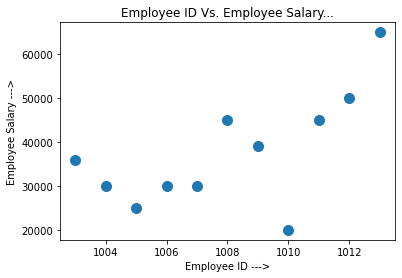

In [40]:
# basic plots
import matplotlib.pyplot as plt
plt.scatter(records_df['EMP-ID'], records_df['EMP-Salary'], s = 100)
plt.xlabel("Employee ID --->")
plt.ylabel("Employee Salary --->")
plt.title("Employee ID Vs. Employee Salary...")
plt.show()

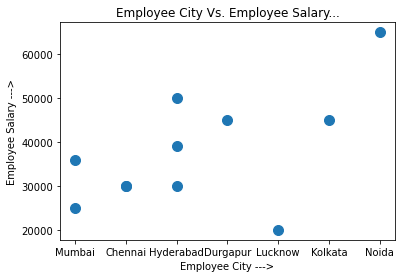

In [42]:
plt.scatter(records_df['EMP-City'], records_df['EMP-Salary'], s = 100)
plt.xlabel("Employee City --->")
plt.ylabel("Employee Salary --->")
plt.title("Employee City Vs. Employee Salary...")
plt.show()

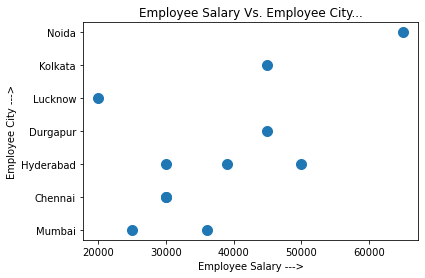

In [43]:
plt.scatter(records_df['EMP-Salary'], records_df['EMP-City'], s = 100)
plt.ylabel("Employee City --->")
plt.xlabel("Employee Salary --->")
plt.title("Employee Salary Vs. Employee City...")
plt.show()